<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A16_Xinming_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import scipy.stats
from scipy import stats as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

Question 1: Provide a general single linear regression equation and explain all the terms

The general single linear regression equation is: Y = b0+ b1X1 + e
Y in this eqaution is the dependent variable, beta 0 is the y intercept,b0 is the value of Y when all of the independent variables are zero. X1 is the distinct independent or predictor variable, while b1 is the estimated regression coefficient. e is the error

Question 2. Explain how the best fitting line is determined using the ordinary least squares method.

The ordinary least sqaure(OLS) method finds the best-fit line for the data by minimizing the sum of squared errors or residuals between the actual and predicted values.Therefore OLS will be able to determine decent result for the best fitting line in the regression model. 

Question 3. What is a residual? How are residuals calculated?

Residual can be defined by an easy function: 
Residual = Actual y value – Predicted y value.
It is essentially the difference between the predicted y value and the actual y value. In a perfect condition when residuals are always 0, then the model has a Perfect fit. on the other hand, Having a negative residual means that the predicted value is too high, and a positive residual means that the predicted value was too low. The aim of regression line is to minimise the sum of residuals.



Question 4. Explain how R-squared is calculated. 

R-squared value is a measure that provides information about the fitness or accuracy of a model. It can be calculated as function 1-(sum squared regression (SSR)/total sum of squares (SST)). The closer the R2 value to 1, then better fitting the regression model is. 


Question 5. What are the units of R-squared? 

The units of the R-sqaured value is determined by what data we are processing. It is essnetially a a fraction between 0.0 and 1.0, which means there's no real units for R sqaured. For our analysis we can say that our r units are align with the Y axis values, which is the heating load units. 


Question 6. Explain how Root Mean Square Error (RMSE) is calculated. What are the units of measurement for RMSE?

Root mean sqaure error shows how far predictions fall from measured true values. RMSE is a combination of calculated residual (difference between prediction and truth), computed norm of residual for each data point, computed the mean of residuals and take the square root of that mean. It can also be explained as the standard deviation of the residuals, and measures how spread out these residuals are from the regression line. The units for RMSE is also simular to the R squared values that they follow our input units. In this case for our data we have heating load as the untis for most of our regression models. 


In [ ]:
#Task 1: Extract out only the “Heating_Load”, “Relative_Compactness”, “Wall_Area”, and “Roof_Area” attributes.
EE=pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/energy_efficiency_data.csv")
E=EE[["Heating_Load","Relative_Compactness","Wall_Area","Roof_Area"]]
E

,Heating_Load,Relative_Compactness,Wall_Area,Roof_Area
0,15.55,0.98,294.0,110.25
1,15.55,0.98,294.0,110.25
2,15.55,0.98,294.0,110.25
3,15.55,0.98,294.0,110.25
4,20.84,0.90,318.5,122.50
...,...,...,...,...
763,17.88,0.64,343.0,220.50
764,16.54,0.62,367.5,220.50
765,16.44,0.62,367.5,220.50
766,16.48,0.62,367.5,220.50


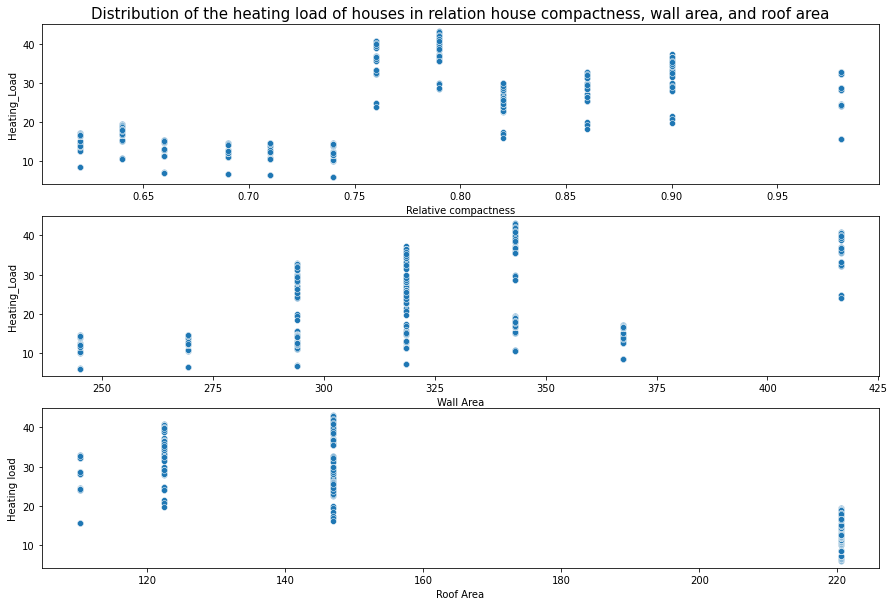

In [ ]:
#Task 2: Create scatterplots to compare the dependent variable (“Heat_Load”) with each of the three independent variables separately
plt.rcParams['figure.figsize'] = [15, 10]
scatter_plot, axs = plt.subplots(3,1)
sns.scatterplot(ax = axs[0], y = "Heating_Load", x = "Relative_Compactness", data = E)
axs[0].set_title("Distribution of the heating load of houses in relation house compactness, wall area, and roof area", fontsize = 15)
axs[0].set_xlabel("Relative compactness", fontsize = 10)
sns.scatterplot(ax = axs[1], y = "Heating_Load", x = "Wall_Area", data = E)
axs[1].set_xlabel("Wall Area", fontsize = 10)
sns.scatterplot(ax = axs[2], y = "Heating_Load", x = "Roof_Area", data = E)
axs[2].set_ylabel("Heating load", fontsize = 10)
axs[2].set_xlabel("Roof Area", fontsize = 10)
plt.show(scatter_plot)

In [ ]:
#Task 3. Obtain Pearson correlation coefficients for “Heat_Load” and each of the three independent variables of interest.
# Pearson correlation coefficients
print("Heating load and Relative compactness =",(st.pearsonr(E["Heating_Load"], E["Relative_Compactness"])))
print("Heating load and Wall Area =",(st.pearsonr(E["Heating_Load"], E["Wall_Area"])))
print("Heating load and Roof area =", (st.pearsonr(E["Heating_Load"], E["Roof_Area"])))

Heating load and Relative compactness = (0.6222721790646626, 1.5912736997118763e-83)
Heating load and Wall Area = (0.4556711568983096, 1.221888688332153e-40)
Heating load and Roof area = (-0.8618282529058219, 4.914880966403568e-228)


Question 6. Discuss the relationships between the dependent variable and each
independent variable based on the scatterplots and correlation coefficients obtained. Does each independent variable appear to be correlated with “Heat_Load”? If so, is the correlation positive or negative? Is the correlation linear?

Our dependent variable "heating load" does respond differently to each independent variable "compactness, wall area, roof area". The overall relationships from the generated scatterplot display small positive correlation with compactness and wall area, but not so much for the roof area. The coefficients obtained from the pearson tests also indicates that the thoese relationships are in the "middle" around 0.4, 0.6 and -0.8, which means the correlation with heat load is a bit insiginificant. The two positive corrlations are related to the compactness and wall areas and the negative correaltion is related to the roof area. They are all not very lineared graphs from my obervation. 

In [ ]:
#Task 4. Create three separate single linear regression models in which “Heat_Load” is predicted using one of the available predictor variables
Heat = E[["Heating_Load"]]
Compact = E[["Relative_Compactness"]]
lmMod1 = LinearRegression()
lmMod1.fit(Heat, Compact)
print(f"intercept: {lmMod1.intercept_}")
print(f"coefficients: {lmMod1.coef_}")

intercept: [0.61864788]
coefficients: [[0.0065234]]


In [ ]:
Wall = E[["Wall_Area"]]
lmMod2 = LinearRegression()
lmMod2.fit(Heat, Wall)
print(f"intercept: {lmMod2.intercept_}")
print(f"coefficients: {lmMod2.coef_}")

intercept: [274.55118117]
coefficients: [[1.9701629]]


In [ ]:
Roof = E[["Roof_Area"]]
lmMod3 = LinearRegression()
lmMod3.fit(Heat, Roof)
print(f"intercept: {lmMod3.intercept_}")
print(f"coefficients: {lmMod3.coef_}")

intercept: [262.65941439]
coefficients: [[-3.85773408]]


In [ ]:
#Task 4. Calculate or obtain the R-squared and RMSE metrics for each of the three models

#R-square of heating load and relative compactness
r1 = lmMod1.score(Heat, Compact)
print(r1)
#R-squared of heating load and wall area
r2 = lmMod2.score(Heat, Wall)
print(r2)
#R-squared heating load and roof area
r3 = lmMod3.score(Heat, Roof)
print(r3)
#
predict1=lmMod1.predict(Heat)
predict2=lmMod2.predict(Heat)
predict3=lmMod3.predict(Heat)
print("RMSE of heating load and relative compactness =", (mean_squared_error(Compact, predict1, squared = False)))
print("RMSE of heating load and wall area =", (mean_squared_error(Wall, predict2, squared = False)))
print("RMSE of heating load and roof area =", (mean_squared_error(Roof, predict3, squared = False)))

0.3872226648378836
0.20763620322904397
0.7427479375067012
RMSE of heating load and relative compactness = 0.08274878355976338
RMSE of heating load and wall area = 38.80874259584551
RMSE of heating load and roof area = 22.89326082189572


Question 7. Compare the model fit using R-squared and RMSE. Do the model results
agree with the results obtained using the scatterplots and Pearson correlation
coefficients? In other words, did the variable with the highest linear correlation yield the best performing model? 

Both R sqaured and RMSE resutls are quite interesting for this dataset. From our previous scatterplots and pearson correlation test, we indicated the correlations between these variables to heating load are quite insignificant. The model results also showed that there's a low correlation among the independent varibales with our dependent variable "heating load". The highest linear correlation is between the roof area and heating load, has a neagtive coefficient of -0.86, and this model also has the highest R sqaured value, which means it is a higher performing model in this analysis. 